# Integrated Simulations

In [1]:
# To manipulate arrays
import pandas as pd
import pathlib
import sys
import matplotlib.pyplot as plt 

# Plotting
current_dir = pathlib.Path().absolute()
rsnaped_dir = current_dir.parents[0].joinpath('rsnaped')
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp
import numpy as np
from ipywidgets import  VBox 


In [2]:

# Defining directories
video_dir = current_dir.parents[0].joinpath('DataBases','Jacks_Data')
#video_dir = current_dir.parents[0].joinpath('DataBases','Hela')


In [3]:
# Load videos 
path_files, list_files_paths, list_videos, num_videos = rsp.Utilities.read_files_in_directory(directory=video_dir, extension_of_files_to_look_for = 'tif',return_images_in_list=True)

#max_frames_to_read = 10
#list_videos[0] = list_videos[0][0:max_frames_to_read,:,:,:]

In [4]:
list_videos[0].shape


(49, 5, 512, 512)

IndexError: tuple index out of range

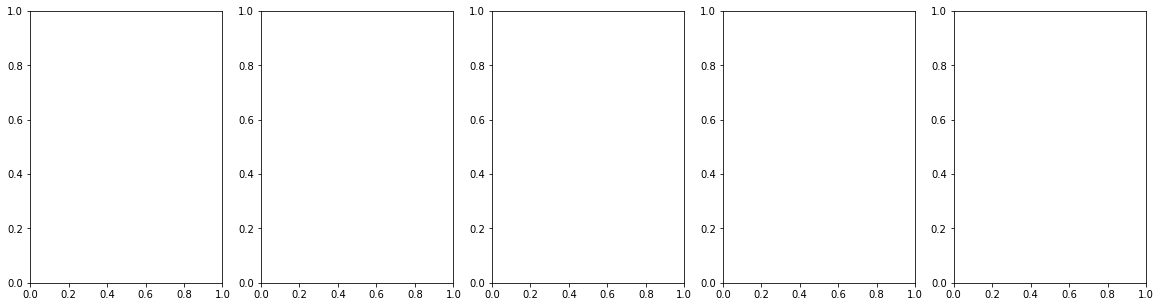

In [5]:
num_colors = list_videos[0].shape[1]
_, axes = plt.subplots(nrows = 1, ncols = num_colors, figsize = (20, 5))
for i in range (0, num_colors):
    temp_img =rsp.RemoveExtrema(list_videos[0][0,i,:,:], min_percentile = 0.5, max_percentile = 99).remove_outliers()
    axes[i].imshow(temp_img)
    axes[i].grid(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title('Ch_'+str(i), fontsize=20 )

In [ ]:
number_time_points = 10#list_videos[0].shape[0]
selected_movie = 0
_, axes = plt.subplots(nrows = 1, ncols = number_time_points, figsize = (25, 6))
for i in range (0, number_time_points):
    temp_img =rsp.RemoveExtrema(list_videos[0][i,selected_movie,:,:], min_percentile = 0.5, max_percentile = 99).remove_outliers()
    axes[i].imshow(temp_img)
    axes[i].grid(False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_title('Ch_'+str(i), fontsize=20 )

In [ ]:
tensor_video = list_videos[0][:,selected_movie,:,:]
tensor_video_expanded =  tensor_video.reshape(tensor_video.shape + (1,))
tensor_video_expanded.shape

In [ ]:
# Plot only selected trajectories
#plt.rcParams['figure.figsize'] = [5,5]
tensor_video_expanded =rsp.RemoveExtrema(tensor_video_expanded, min_percentile = 1, max_percentile = 90).remove_outliers()

#controls_pr, output_pr = rsp.VisualizerVideo(tensor_video,dataframe_particles=dataframe_simulated_cell,normalize=False).make_video_app()
controls_pr, output_pr = rsp.VisualizerVideo(tensor_video_expanded,normalize=False,step_size_in_sec=1).make_video_app()
display(VBox([controls_pr, output_pr]))

In [ ]:
selected_masks = rsp.Cellpose(video= tensor_video_expanded[35,:,:,0], num_iterations = 4, channels = [0,0], diameter = 100, model_type = 'cyto', selection_method = 'max_cells').calculate_masks() # options are 'max_area' or 'max_cells'
plt.imshow(selected_masks)

In [ ]:
for i,vid in enumerate(list_videos):
    rsp.Plots.plot_image_channels(vid,selected_time_point = 0)

# Tracking

In [ ]:
selected_channel_tracking = 0
selected_channel_segmentation = 1
intensity_calculation_method = 'disk_donut'  # options are : 'total_intensity' and 'disk_donut' 'gaussian_fit'
mask_selection_method = 'all_cells_in_image'           # options are : 'all_cells_in_image', 'max_spots' and 'max_area' 
use_optimization_for_tracking = 1            # 0 not using, 1 is using optimization
min_percentage_time_tracking = 0.1            # (normalized) minimum time to consider a trajectory.
particle_detection_size = 7                  # spot size for the simulation and tracking.
selected_channel = 0                         # Selected channel for tracking
average_cell_diameter = 200                    # cell diameter
intensity_threshold_tracking = None          # intensity threshold. If None, the code uses automatic detection # 
real_positions_dataframe = None #pd.read_csv(video_dir.joinpath('both_base_pb_KDM5B_P300_0.06_5.33333_video_cell_0.csv'))

In [ ]:
list_DataFrame_tracking, list_array_intensities, list_time_vector, list_selected_mask = rsp.image_processing( files_dir_path_processing=video_dir,
                                                                                                            particle_size=particle_detection_size,
                                                                                                            selected_channel_tracking = selected_channel_tracking,
                                                                                                            selected_channel_segmentation = selected_channel_segmentation,
                                                                                                            intensity_calculation_method =intensity_calculation_method, 
                                                                                                            mask_selection_method = mask_selection_method,
                                                                                                            show_plot=True,
                                                                                                            use_optimization_for_tracking=use_optimization_for_tracking,
                                                                                                            real_positions_dataframe = real_positions_dataframe,
                                                                                                            average_cell_diameter=average_cell_diameter,
                                                                                                            print_process_times=False,
                                                                                                            min_percentage_time_tracking=min_percentage_time_tracking,
                                                                                                            dataframe_format='long')

In [ ]:
df =list_DataFrame_tracking[1]


In [ ]:
df.head()

In [ ]:
df.tail()